<a href="https://colab.research.google.com/github/glatham1/ECGR_4105_MachineLearning/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy:  0.8246753246753247
Precision:  0.7631578947368421
Recall:  0.6170212765957447
F1 Score:  0.6823529411764706


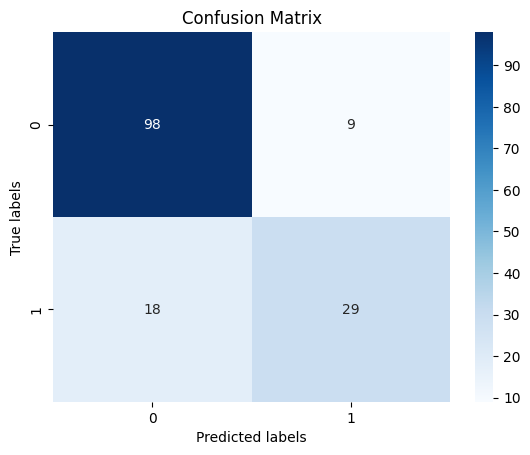

In [7]:
# Problem 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Pre-process the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
clf = LogisticRegression(max_iter=1000)

# Train the model
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Report the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Plotting the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


(a) Without weight penalty:
Accuracy:  0.9385964912280702
Precision:  0.9166666666666666
Recall:  0.9361702127659575
F1 Score:  0.9263157894736843


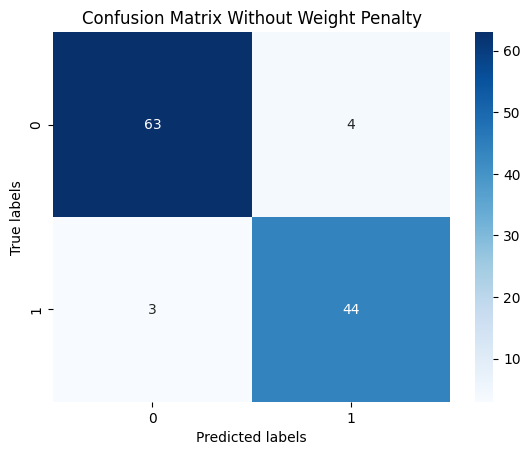

(b) With weight penalty (L2 regularization):
Accuracy:  0.9649122807017544
Precision:  0.9574468085106383
Recall:  0.9574468085106383
F1 Score:  0.9574468085106385


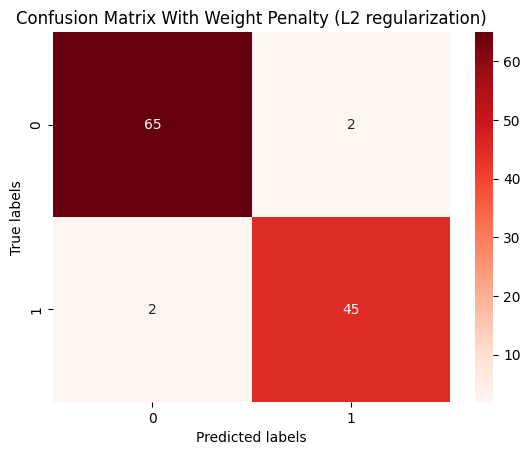

In [8]:
# Problem 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the cancer dataset
df_cancer = pd.read_csv('cancer.csv')
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})
X_cancer = df_cancer.drop('diagnosis', axis=1)
y_cancer = df_cancer['diagnosis']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_cancer_imputed = imputer.fit_transform(X_cancer)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_imputed, y_cancer, test_size=0.20, random_state=0)

# Pre-process the data
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# Build the logistic regression model
clf_cancer = LogisticRegression(max_iter=1000, penalty=None)

# Train the model
clf_cancer.fit(X_train_cancer_scaled, y_train_cancer)
y_pred_cancer = clf_cancer.predict(X_test_cancer_scaled)

# Report the results
print("(a) Without weight penalty:")
print("Accuracy: ", accuracy_score(y_test_cancer, y_pred_cancer))
print("Precision: ", precision_score(y_test_cancer, y_pred_cancer))
print("Recall: ", recall_score(y_test_cancer, y_pred_cancer))
print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer))

# Plotting the confusion matrix
conf_mat_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
sns.heatmap(conf_mat_cancer, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Without Weight Penalty')
plt.show()

# (b) With weight penalty (L2 regularization)
clf_cancer_penalty = LogisticRegression(max_iter=1000, penalty='l2')

# Train the model
clf_cancer_penalty.fit(X_train_cancer_scaled, y_train_cancer)
y_pred_cancer_penalty = clf_cancer_penalty.predict(X_test_cancer_scaled)

# Report the results
print("(b) With weight penalty (L2 regularization):")
print("Accuracy: ", accuracy_score(y_test_cancer, y_pred_cancer_penalty))
print("Precision: ", precision_score(y_test_cancer, y_pred_cancer_penalty))
print("Recall: ", recall_score(y_test_cancer, y_pred_cancer_penalty))
print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer_penalty))

# Plotting the confusion matrix
conf_mat_cancer_penalty = confusion_matrix(y_test_cancer, y_pred_cancer_penalty)
sns.heatmap(conf_mat_cancer_penalty, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix With Weight Penalty (L2 regularization)')
plt.show()


In [9]:
# Problem 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the cancer dataset
df_cancer = pd.read_csv('cancer.csv')
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})
X_cancer = df_cancer.drop('diagnosis', axis=1)
y_cancer = df_cancer['diagnosis']

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
X_cancer_imputed = imputer.fit_transform(X_cancer)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_imputed, y_cancer, test_size=0.20, random_state=0)

# Scale the dataset
scaler = StandardScaler()
X_train_cancer = scaler.fit_transform(X_train_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

# Build the naive Bayesian model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = nb_classifier.predict(X_test_cancer)

# Report the classification metrics
print("Classification Accuracy: ", accuracy_score(y_test_cancer, y_pred_cancer))
print("Precision: ", precision_score(y_test_cancer, y_pred_cancer))
print("Recall: ", recall_score(y_test_cancer, y_pred_cancer))
print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer))


Classification Accuracy:  0.9122807017543859
Precision:  0.8775510204081632
Recall:  0.9148936170212766
F1 Score:  0.8958333333333333


In [10]:
# Problem 4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the cancer dataset
df_cancer = pd.read_csv('cancer.csv')
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})
X_cancer = df_cancer.drop('diagnosis', axis=1)
y_cancer = df_cancer['diagnosis']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_cancer_imputed = imputer.fit_transform(X_cancer)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer_imputed)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_scaled, y_cancer, test_size=0.20, random_state=0)

# Identify optimum number of K principal components
max_features = X_cancer_scaled.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_cancer)
    X_test_pca = pca.transform(X_test_cancer)

    # Train a logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y_train_cancer)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test_cancer, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(y_test_cancer, y_pred)
        best_recall = recall_score(y_test_cancer, y_pred)
        best_f1 = f1_score(y_test_cancer, y_pred)

print(f"Best K: {best_k}")
print("Accuracy for best K: ", best_accuracy)
print("Precision for best K: ", best_precision)
print("Recall for best K: ", best_recall)
print("F1 Score for best K: ", best_f1)


Best K: 15
Accuracy for best K:  0.9649122807017544
Precision for best K:  0.9574468085106383
Recall for best K:  0.9574468085106383
F1 Score for best K:  0.9574468085106385


In [6]:
# Problem 5

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the cancer dataset
df_cancer = pd.read_csv('cancer.csv')
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})
X_cancer = df_cancer.drop('diagnosis', axis=1)
y_cancer = df_cancer['diagnosis']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_cancer_imputed = imputer.fit_transform(X_cancer)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer_imputed)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_scaled, y_cancer, test_size=0.20, random_state=0)

# Identify optimum number of K principal components
max_features = X_cancer_scaled.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_cancer)
    X_test_pca = pca.transform(X_test_cancer)

    # Train a Naive Bayes classifier
    clf = GaussianNB()
    clf.fit(X_train_pca, y_train_cancer)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test_cancer, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(y_test_cancer, y_pred)
        best_recall = recall_score(y_test_cancer, y_pred)
        best_f1 = f1_score(y_test_cancer, y_pred)

print(f"Best K: {best_k}")
print("Accuracy for best K: ", best_accuracy)
print("Precision for best K: ", best_precision)
print("Recall for best K: ", best_recall)
print("F1 Score for best K: ", best_f1)


Best K: 5
Accuracy for best K:  0.9298245614035088
Precision for best K:  0.9333333333333333
Recall for best K:  0.8936170212765957
F1 Score for best K:  0.9130434782608695
